# Email Spam or Not Spam Machine Learning Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC


# Collect Data 

In [2]:
data = pd.read_csv('Emails dataset.csv')

# Preprocessing

In [3]:
data.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [4]:
data.tail()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
4295,Email 4296,21,9,15,3,8,3,88,2,8,...,0,0,0,0,0,0,0,0,0,0
4296,Email 4297,8,16,7,6,1,0,97,1,1,...,0,0,0,0,0,0,0,2,0,0
4297,Email 4298,1,0,1,1,1,0,3,0,1,...,0,0,0,0,0,0,0,0,0,0
4298,Email 4299,3,11,3,3,4,2,41,2,1,...,0,0,0,0,0,0,0,2,0,1
4299,Email 4300,1,1,1,1,0,0,7,0,1,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4300 entries, 0 to 4299
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 98.5+ MB


In [6]:
print('Null Values: ',data.isnull().values.sum())

Null Values:  0


there is no null value in it thats why we dont need to handle it


Spam emails: 73
Non-spam emails: 4227
Total emails: 4300


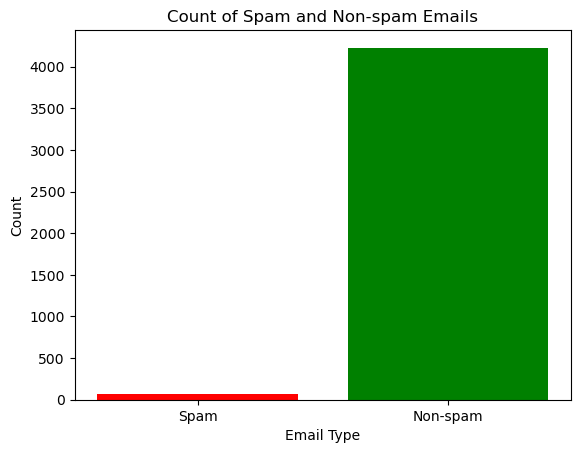

In [7]:
spam_count = sum(data['spam'])
non_spam_count = len(data) - spam_count
total_emails = len(data)
print("\nSpam emails:", spam_count)
print("Non-spam emails:", non_spam_count)
print("Total emails:", total_emails)

categories = ['Spam', 'Non-spam']
counts = [spam_count, non_spam_count]

plt.bar(categories, counts, color=['red', 'green'])
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.title('Count of Spam and Non-spam Emails')
plt.show()

# Feature Selection

In [8]:
input_X = data.drop(columns=['Prediction','Email No.'])
input_Y = data.Prediction

In [9]:
scaler = StandardScaler()
X = scaler.fit_transform(input_X)

# Train & Test Data

In [10]:
X_train, x_test, Y_train, y_test = train_test_split(X, input_Y, test_size=0.3, random_state=42)

# Applying SMOTE Technique For Class Imbalance Problem

In [11]:
smote = SMOTE(random_state=42)
X_resampled, Y_resampled = smote.fit_resample(X_train, Y_train)


Spam enalls (after balancing): 2141
Non-span emails (after balancing): 2141
Totel emails (after balancing): 4282


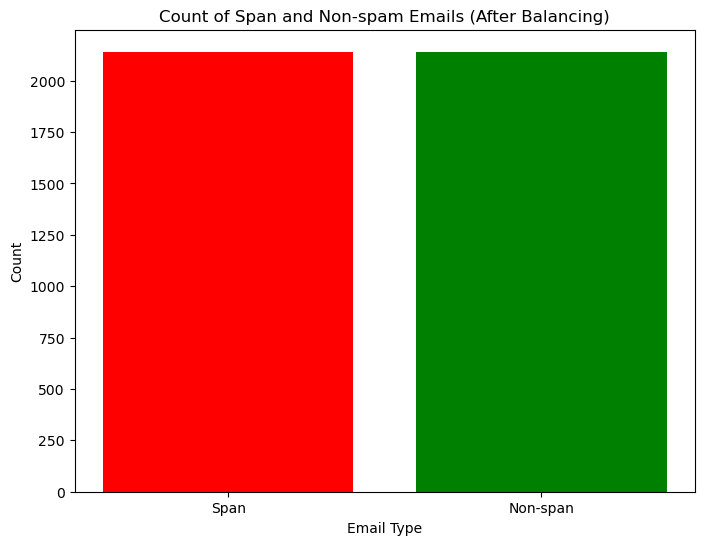

In [12]:
spam_count_balanced= sum(Y_resampled)
non_spam_count_balanced =len(Y_resampled)- spam_count_balanced
total_emails_balanced= len(Y_resampled)

print('\nSpam enalls (after balancing):', spam_count_balanced) 
print("Non-span emails (after balancing):", non_spam_count_balanced)
print("Totel emails (after balancing):", total_emails_balanced)
plt.figure(figsize=(8, 6))
plt.bar(["Span", "Non-span"], [spam_count_balanced, non_spam_count_balanced], color=["red", 'green'])
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.title('Count of Span and Non-spam Emails (After Balancing)')
plt.show()

# Logistic Regression Algorithm

In [13]:
model = LogisticRegression(max_iter=1000, class_weight="balanced")
model.fit(X_resampled, Y_resampled)


LogisticRegression(class_weight='balanced', max_iter=1000)

In [14]:
y_pred = model.predict(x_test)

# Confusion Matrix

In [15]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[881  50]
 [  7 352]]


# Accuracy

In [16]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 95.58%


# Classificatio Report

In [17]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n ",class_report)

Classification Report:
                precision    recall  f1-score   support

           0       0.99      0.95      0.97       931
           1       0.88      0.98      0.93       359

    accuracy                           0.96      1290
   macro avg       0.93      0.96      0.95      1290
weighted avg       0.96      0.96      0.96      1290

